In [100]:
from standardInclude import *

### Computing the fraction of the positrons which are common/unique weighted by the Asymmetry values

In [101]:
splineFile = "./data/splinesForJosh.root"

In [102]:
# High Kick
inFile = "./data/highkick/results_EvW_HighKick_Feb5.root"
splineName = "HighKickASpline"

dataset="highkick"

In [103]:
#f = r.TFile("./data/9day/gm2offline_ana.root")
f = r.TFile(inFile)
outpath="./images/"+dataset+"/onetoone/"

---

In [104]:
reconEastEnergyConstants = [1000. for i in range(24)]
reconEastEnergyConstantsErrors = [0. for i in range(24)]

In [105]:
westEnergyThreshold = 1000

In [106]:
reconEastEnergyConstantsHigh = [3000. for i in range(24)]
reconEastEnergyConstantsErrorsHigh = [0. for i in range(24)]

In [107]:
westEnergyThresholdHigh = 2860

In [108]:
r.gStyle.SetOptFit(1)

limmax = 6000

evwEnergyEvWvec = []
westBoxVec = []
eastBoxVec = []
for calo in range(1,25):
    print("Starting calo:", calo)
    try:
        evwEnergyEvW_i = f.Get("farline").Get("evw_calo"+str(calo)).Get("evwEnergyEvW").Clone(str(calo))
        #print(evwEnergyEvW_i)
        evwEnergyEvWvec.append( evwEnergyEvW_i.Clone( "h"+str(calo) ) )
    except:
        print("Error in calo:", calo)
    #evwEnergyEvW_i = f.Get("farline").Get("evwEnergyEvW").Clone("evw_calo"+str(calo))
    
    wxlims = [0,limmax]
    wylims = [westEnergyThreshold,limmax]
    wboxi = r.TBox(wxlims[0],wylims[0],wxlims[1],wylims[1])
    wboxi.SetFillColorAlpha(30,0.3)
    westBoxVec.append(wboxi.Clone(str(calo)))
    
    exlims = [reconEastEnergyConstants[calo-1],limmax]
    eylims = [0,limmax]
    eboxi = r.TBox(exlims[0],eylims[0],exlims[1],eylims[1])
    eboxi.SetFillColorAlpha(38,0.3)
    eastBoxVec.append(eboxi.Clone(str(calo)))


Starting calo: 1
Starting calo: 2
Starting calo: 3
Starting calo: 4
Starting calo: 5
Starting calo: 6
Starting calo: 7
Starting calo: 8
Starting calo: 9
Starting calo: 10
Starting calo: 11
Starting calo: 12
Starting calo: 13
Starting calo: 14
Starting calo: 15
Starting calo: 16
Starting calo: 17
Starting calo: 18
Starting calo: 19
Starting calo: 20
Starting calo: 21
Starting calo: 22
Starting calo: 23
Starting calo: 24


In [109]:
print(evwEnergyEvWvec)

[<ROOT.TH2I object ("h1") at 0x7fffc70ab210>, <ROOT.TH2I object ("h2") at 0x7fffc6e2d660>, <ROOT.TH2I object ("h3") at 0x7fffc6e5ac30>, <ROOT.TH2I object ("h4") at 0x7fffc6d089e0>, <ROOT.TH2I object ("h5") at 0x7fffc70bd210>, <ROOT.TH2I object ("h6") at 0x7fffc6d213b0>, <ROOT.TH2I object ("h7") at 0x7fffc6e315d0>, <ROOT.TH2I object ("h8") at 0x7fffc73a13d0>, <ROOT.TH2I object ("h9") at 0x7fffc7380660>, <ROOT.TH2I object ("h10") at 0x7fffc737caf0>, <ROOT.TH2I object ("h11") at 0x7fffc74f5c00>, <ROOT.TH2I object ("h12") at 0x7fffc6b775c0>, <ROOT.TH2I object ("h13") at 0x7fffc79efc90>, <ROOT.TH2I object ("h14") at 0x7fffc70377b0>, <ROOT.TH2I object ("h15") at 0x7fffc6eb5630>, <ROOT.TH2I object ("h16") at 0x7fffc7569650>, <ROOT.TH2I object ("h17") at 0x7fffc6d77d60>, <ROOT.TH2I object ("h18") at 0x7fffc74f2b30>, <ROOT.TH2I object ("h19") at 0x7fffc6351e90>, <ROOT.TH2I object ("h20") at 0x7fffc76abfb0>, <ROOT.TH2I object ("h21") at 0x7fffc7755d70>, <ROOT.TH2I object ("h22") at 0x7fffc6bb546

---

### Open and get the spline

In [110]:
fspline = r.TFile(splineFile)
spline = fspline.Get(splineName)

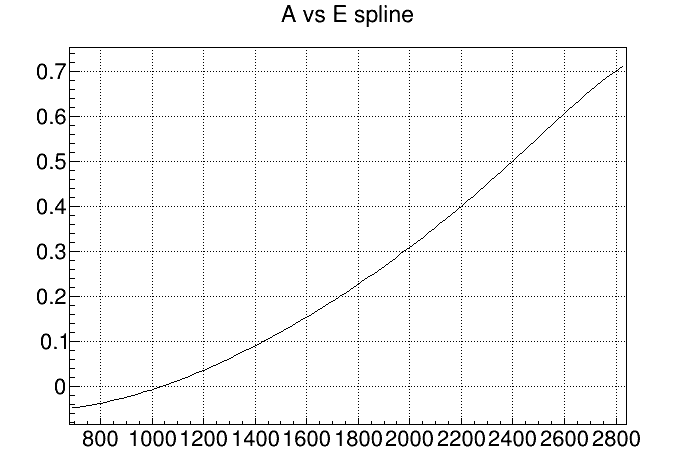

In [111]:
c = r.TCanvas()
spline.Draw()
c.SetGrid()
c.Draw()

In [112]:
spline.Eval(1000)

-0.006134366689315381

In [113]:
spline.Eval(3000)

0.7576353522264179

In [114]:
spline.Eval(1500)

0.12193487774068695

---

### Now calculate the number of clusters in each region weighted appropriately

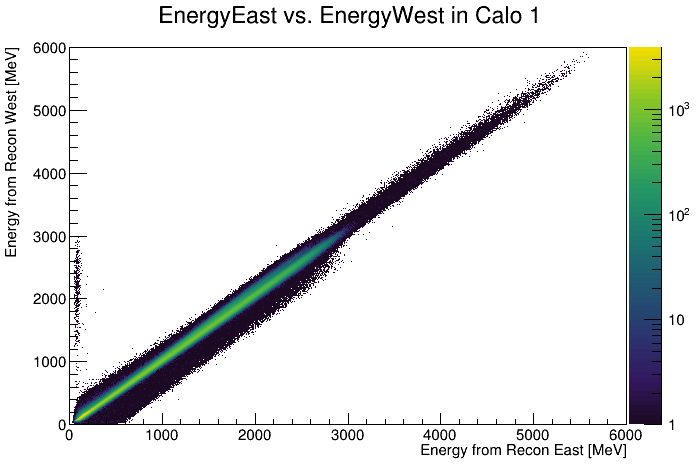

In [115]:
c = r.TCanvas()
evwEnergyEvWvec[0].Draw("colz")
c.SetLogz()
c.Draw()

In [116]:
r.gStyle.SetOptFit(1)

limmax = 6000

westBoxVec = []
eastBoxVec = []

numVec = []

c = r.TCanvas()

for i, hist in enumerate(evwEnergyEvWvec):
    print("Starting calo", i+1)
    #c5.cd(i+1)
    #r.gPad.SetLogz()
    hist.GetXaxis().SetRangeUser(0,limmax)
    hist.GetYaxis().SetRangeUser(0,limmax)
    
    '''
    x1 = [0, reconEastEnergyConstants[i], 0, reconEastEnergyConstants[i]]
    x2 = [reconEastEnergyConstants[i], limmax, reconEastEnergyConstants[i], limmax]
    x3 = x1
    x4 = x3
    y1 = [0,0,westEnergyThreshold,westEnergyThreshold]
    y2 = y1
    y3 = [westEnergyThreshold,westEnergyThreshold,limmax,limmax]
    y4 = y3
    '''
    x1 = [0, reconEastEnergyConstants[i], 0, reconEastEnergyConstants[i]]
    x2 = [reconEastEnergyConstants[i], limmax, reconEastEnergyConstants[i], limmax]
    x3 = x2
    x4 = x1
    y1 = [0,0,westEnergyThreshold,westEnergyThreshold]
    y2 = y1
    y3 = [westEnergyThreshold,westEnergyThreshold,limmax,limmax]
    y4 = y3
    
    cuts = []
    
    for j in range(len(x1)):
        name = "cut"+str(j)
        cuti = r.TCutG(name)
        cuti.SetPoint(0,x1[j],y1[j])
        cuti.SetPoint(1,x2[j],y2[j])
        cuti.SetPoint(2,x3[j],y3[j])
        cuti.SetPoint(3,x4[j],y4[j])
        cuti.SetPoint(4,x1[j],y1[j])
    
        cuts.append((name, cuti.Clone()))
        
    numVeci = []
    allHists = []
    for j, cut in enumerate(cuts):
        name = str(cut[0])
        if(j % 2 == 0):
            h = hist.ProjectionY("h",0,-1,"["+name+"]").Clone()
        else:
            h = hist.ProjectionX("h",0,-1,"["+name+"]").Clone()
        for bini in range(1,h.GetNbinsX()+1):
            contenti = h.GetBinContent(bini)
            bincenter = h.GetXaxis().GetBinCenter(bini)
            #print(spline.Eval(h.GetXaxis().GetBinCenter(i)), contenti, contenti*spline.Eval(h.GetXaxis().GetBinCenter(i)))
            if(bincenter > 1000 and bincenter < 3000):
                splinei = np.abs( spline.Eval(h.GetXaxis().GetBinCenter(bini)) )
                h.SetBinContent(bini, contenti*splinei*splinei)
                #h.SetBinContent(bini, contenti)
            else:
                h.SetBinContent(bini, 0)
        numVeci.append(h.Integral())
        allHists.append(h.Clone("h_"+str(j)))
        
    numVec.append(numVeci)
    if(i > 541):
        break

Starting calo 1
Starting calo 2
Starting calo 3
Starting calo 4
Starting calo 5
Starting calo 6
Starting calo 7
Starting calo 8
Starting calo 9
Starting calo 10
Starting calo 11
Starting calo 12
Starting calo 13
Starting calo 14
Starting calo 15
Starting calo 16
Starting calo 17
Starting calo 18
Starting calo 19
Starting calo 20
Starting calo 21
Starting calo 22
Starting calo 23
Starting calo 24


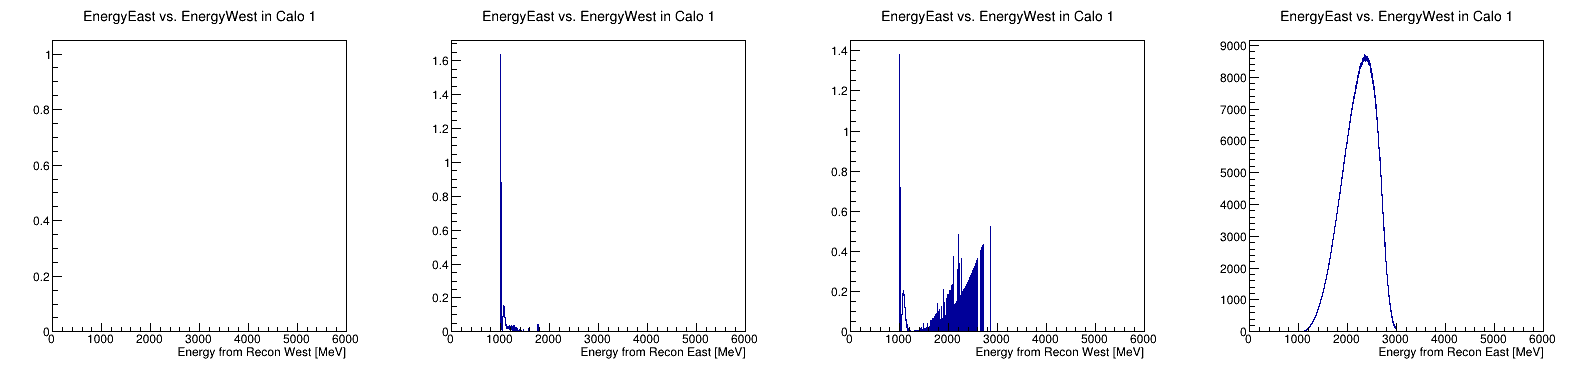

In [117]:
c= r.TCanvas("c","c",1600,400)
c.Divide(4)
for i, h in enumerate(allHists):
    c.cd(i+1)
    h.Draw()
    #r.gPad.SetLogy()
c.Draw()

In [118]:
r.gStyle.SetOptFit(1)

westHigh = 2860
eastHigh = 3000

limmax = 6000

westBoxVec = []
eastBoxVec = []


c = r.TCanvas()

for i, hist in enumerate(evwEnergyEvWvec):
    print("Starting calo", i+1)
    #c5.cd(i+1)
    #r.gPad.SetLogz()
    hist.GetXaxis().SetRangeUser(0,limmax)
    hist.GetYaxis().SetRangeUser(0,limmax)

    x1 = [0, reconEastEnergyConstantsHigh[i], 0, reconEastEnergyConstantsHigh[i]]
    x2 = [reconEastEnergyConstantsHigh[i], limmax, reconEastEnergyConstantsHigh[i], limmax]
    x3 = x2
    x4 = x1
    y1 = [0,0,westEnergyThresholdHigh,westEnergyThresholdHigh]
    y2 = y1
    y3 = [westEnergyThresholdHigh,westEnergyThresholdHigh,limmax,limmax]
    y4 = y3
    
    cuts = []
    
    for j in range(len(x1)):
        name = "cut"+str(j)
        cuti = r.TCutG(name)
        cuti.SetPoint(0,x1[j],y1[j])
        cuti.SetPoint(1,x2[j],y2[j])
        cuti.SetPoint(2,x3[j],y3[j])
        cuti.SetPoint(3,x4[j],y4[j])
        cuti.SetPoint(4,x1[j],y1[j])
    
        cuts.append((name, cuti.Clone()))
        
    numVeci = []
    allHists = []
    for j, cut in enumerate(cuts):
        name = str(cut[0])
        if(j % 1 == 0):
            h = hist.ProjectionY("h",0,-1,"["+name+"]").Clone()
        else:
            h = hist.ProjectionX("h",0,-1,"["+name+"]").Clone()
        for bini in range(1,h.GetNbinsX()+1):
            contenti = h.GetBinContent(bini)
            bincenter = h.GetXaxis().GetBinCenter(bini)
            #print(spline.Eval(h.GetXaxis().GetBinCenter(i)), contenti, contenti*spline.Eval(h.GetXaxis().GetBinCenter(i)))
            if(bincenter > 1000 and bincenter < 3000):
                splinei = np.abs( spline.Eval(h.GetXaxis().GetBinCenter(bini)) )
                h.SetBinContent(bini, contenti*splinei*splinei)
                #h.SetBinContent(bini, contenti)
            else:
                h.SetBinContent(bini, 0)
        numVeci.append(h.Integral())
        allHists.append(h.Clone("h_"+str(j)))
        
    for j,x in enumerate(numVeci):
        if(j > 0 and j < 3):
            numVec[i][j] += x
    if(i > 541):
        break

Starting calo 1
Starting calo 2
Starting calo 3
Starting calo 4
Starting calo 5
Starting calo 6
Starting calo 7
Starting calo 8
Starting calo 9
Starting calo 10
Starting calo 11
Starting calo 12
Starting calo 13
Starting calo 14
Starting calo 15
Starting calo 16
Starting calo 17
Starting calo 18
Starting calo 19
Starting calo 20
Starting calo 21
Starting calo 22
Starting calo 23
Starting calo 24


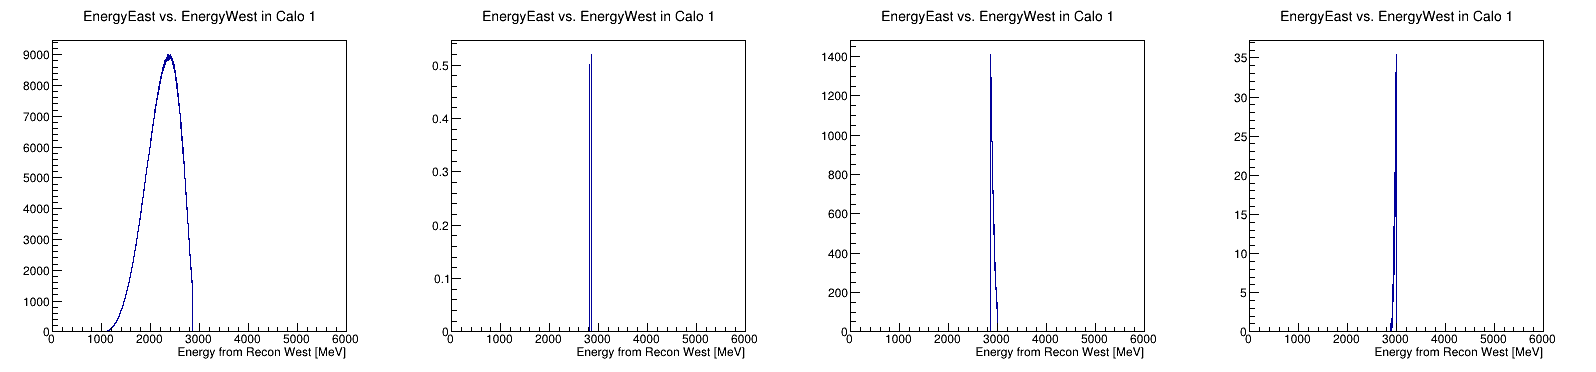

In [119]:
c= r.TCanvas("c","c",1600,400)
c.Divide(4)
for i, h in enumerate(allHists):
    c.cd(i+1)
    h.Draw()
    #r.gPad.SetLogy()
c.Draw()

In [120]:
df = pandas.DataFrame(numVec)
df["2norm"] = df[2]/df[3]*100.
df["3norm"] = df[3]/df[3]*100.
df["0norm"] = df[0]/df[3]*100.
df["1norm"] = df[1]/df[3]*100.

df["UniquePercentEast"] = df[1]/(df[3]+df[1])*100.
df["UniquePercentWest"] = df[2]/(df[3]+df[2])*100.

In [121]:
df.head()

,0,1,2,3,2norm,3norm,0norm,1norm,UniquePercentEast,UniquePercentWest
0,0.0,12.394489,380585.635448,8.281923e+06,4.595377,100.0,0.0,0.000150,0.000150,4.393480
1,0.0,2884.156056,120962.366622,6.993189e+06,1.729717,100.0,0.0,0.041242,0.041225,1.700306
2,0.0,169.980834,80434.557946,8.257158e+06,0.974119,100.0,0.0,0.002059,0.002059,0.964722
3,0.0,7985.295460,132732.737298,8.151832e+06,1.628256,100.0,0.0,0.097957,0.097861,1.602169
4,0.0,246457.127765,17837.106965,1.016555e+07,0.175466,100.0,0.0,2.424434,2.367047,0.175159


In [122]:
df.describe()

,0,1,2,3,2norm,3norm,0norm,1norm,UniquePercentEast,UniquePercentWest
count,24.0,24.000000,24.000000,2.400000e+01,24.000000,24.0,24.0,24.000000,24.000000,24.000000
mean,0.0,12109.093022,202214.964980,8.092594e+06,2.544035,100.0,0.0,0.123606,0.121201,2.458992
std,0.0,49979.893224,121499.469836,5.826620e+05,1.580135,0.0,0.0,0.491040,0.479350,1.485027
min,0.0,6.425586,17837.106965,6.993189e+06,0.175466,100.0,0.0,0.000086,0.000086,0.175159
25%,0.0,33.841292,120762.976190,7.762749e+06,1.549847,100.0,0.0,0.000425,0.000425,1.526186
50%,0.0,626.392625,139853.781235,8.160942e+06,1.771064,100.0,0.0,0.007940,0.007939,1.740227
75%,0.0,3046.495087,259853.254152,8.302710e+06,3.355557,100.0,0.0,0.041710,0.041693,3.243601
max,0.0,246457.127765,473285.716273,1.016555e+07,6.301035,100.0,0.0,2.424434,2.367047,5.927539


In [123]:
df.to_csv(outpath+"set_subset_dataframe_Aweighted.csv")

In [124]:
print("Region 1 Average:", np.sum(df[1])/np.sum(df[3]+df[1])*100., '% of Region 3')
print("Region 2 Average:", np.sum(df[2])/np.sum(df[3]+df[2])*100., '% of Region 3')

Region 1 Average: 0.1494082216955099 % of Region 3
Region 2 Average: 2.4378495229360015 % of Region 3


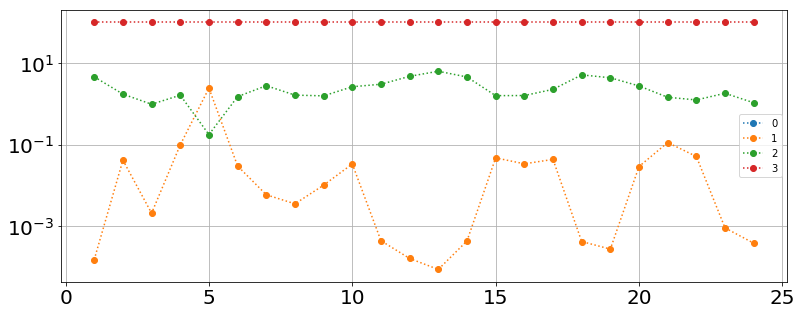

In [125]:
fig, ax = plt.subplots(figsize=(13,5))
for i in range(4):
    plt.plot([x for x in range(1,25)],df[str(i)+"norm"], ':o', label=str(i))
    
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

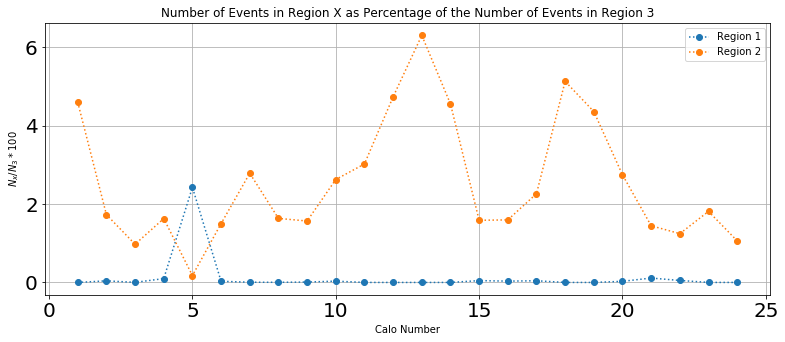

In [126]:
fig, ax = plt.subplots(figsize=(13,5))
plt.title("Number of Events in Region X as Percentage of the Number of Events in Region 3")
plt.xlabel("Calo Number")
plt.ylabel(r"$N_{x} / N_{3} * 100.$")


plt.plot([x for x in range(1,25)],df['1norm'], ':o', label='Region 1')
plt.plot([x for x in range(1,25)],df['2norm'], ':o', label='Region 2')

plt.legend()
plt.grid()
plt.show()

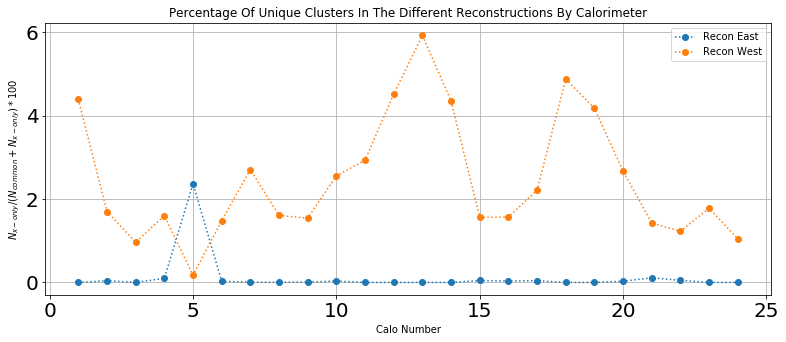

In [127]:
fig, ax = plt.subplots(figsize=(13,5))
plt.title("Percentage Of Unique Clusters In The Different Reconstructions By Calorimeter")
plt.xlabel("Calo Number")
plt.ylabel(r"$N_{x-only} / (N_{common} + N_{x-only}) * 100.$")


plt.plot([x for x in range(1,25)],df['UniquePercentEast'], ':o', label='Recon East')
plt.plot([x for x in range(1,25)],df['UniquePercentWest'], ':o', label='Recon West')

#plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

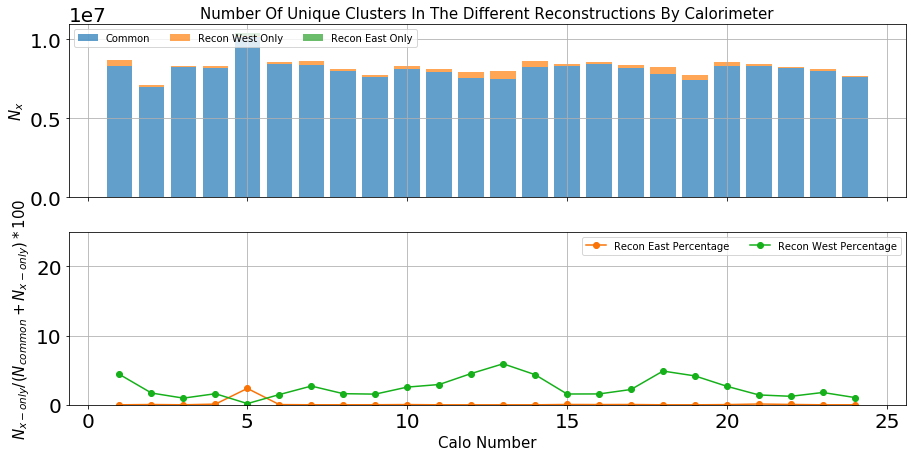

In [128]:
fig, ax = plt.subplots(2,1,figsize=(15,7),sharex = True)
ax[0].set_title("Number Of Unique Clusters In The Different Reconstructions By Calorimeter", fontsize=15)
plt.xlabel("Calo Number", fontsize=15)
ax[0].set_ylabel(r"$N_{x}$", fontsize=15)


ax[0].bar([x for x in range(1,25)],df[3], bottom = 0, label='Common', alpha=0.7)
ax[0].bar([x for x in range(1,25)],df[2], bottom = df[3], label='Recon West Only', alpha=0.7)
ax[0].bar([x for x in range(1,25)],df[1], bottom = df[2]+df[3], label='Recon East Only', alpha=0.7)

#ax[1] = ax1.twinx()
ax[1].set_ylabel(r"$N_{x-only} / (N_{common} + N_{x-only}) * 100.$", fontsize=15)
ax[1].plot([x for x in range(1,25)],df['UniquePercentEast'], '-o', color='xkcd:orange', label='Recon East Percentage')
ax[1].plot([x for x in range(1,25)],df['UniquePercentWest'], '-o', color='xkcd:green', label='Recon West Percentage')


#plt.yscale('log')
#ax[0].set_ylim(0,40000000)
ax[1].set_ylim(0,25)

ax[0].legend(ncol=3,loc = 2)
ax[1].legend(ncol=3,loc=1)

ax[0].grid()
ax[1].grid()
plt.show()

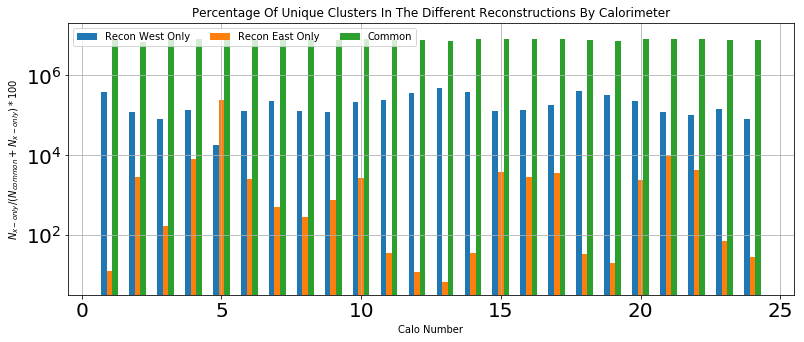

In [129]:
fig, ax = plt.subplots(figsize=(13,5))
plt.title("Percentage Of Unique Clusters In The Different Reconstructions By Calorimeter")
plt.xlabel("Calo Number")
plt.ylabel(r"$N_{x-only} / (N_{common} + N_{x-only}) * 100.$")


plt.bar([x-0.2 for x in range(1,25)],df[2], width=0.2, label='Recon West Only')
plt.bar([x for x in range(1,25)],df[1], width=0.2, label='Recon East Only')
plt.bar([x+0.2 for x in range(1,25)],df[3], width=0.2, label='Common')


plt.yscale('log')
#plt.ylim(1,500000000)

plt.legend(ncol=3)
plt.grid()
plt.show()

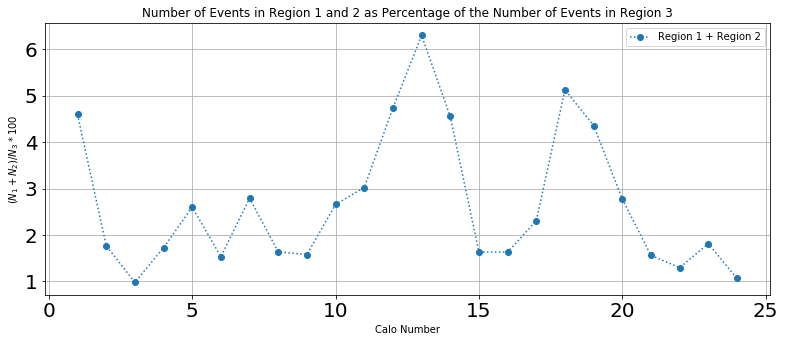

In [130]:
fig, ax = plt.subplots(figsize=(13,5))
plt.title("Number of Events in Region 1 and 2 as Percentage of the Number of Events in Region 3")
plt.xlabel("Calo Number")
plt.ylabel(r"($N_{1} + N_{2}) / N_{3} * 100.$")


plt.plot([x for x in range(1,25)],df['1norm'] + df['2norm'], ':o', label='Region 1 + Region 2')

plt.legend()
plt.grid()
plt.show()

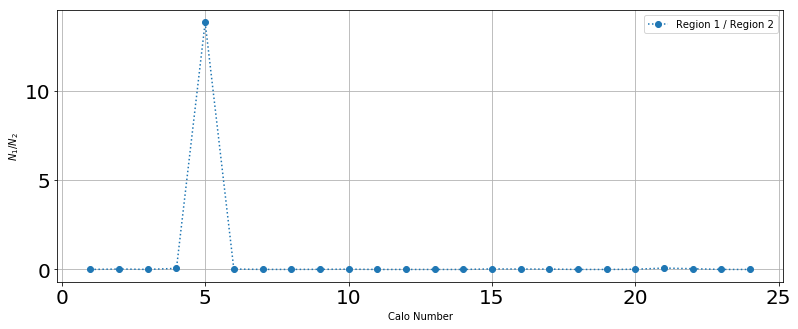

In [131]:
fig, ax = plt.subplots(figsize=(13,5))
plt.xlabel("Calo Number")
plt.ylabel(r"$N_{1} / N_{2}$")


plt.plot([x for x in range(1,25)],df[1]/df[2], ':o', label='Region 1 / Region 2')

plt.legend()
plt.grid()
plt.show()

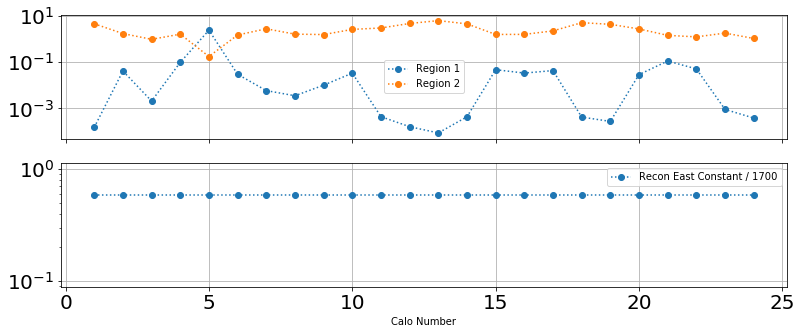

In [132]:
fig, ax = plt.subplots(2,1,figsize=(13,5),sharex=True)
plt.xlabel("Calo Number")


ax[0].plot([x for x in range(1,25)],df['1norm'], ':o', label='Region 1')
ax[0].plot([x for x in range(1,25)],df['2norm'], ':o', label='Region 2')
ax[1].plot([x for x in range(1,25)],[x/1700 for x in reconEastEnergyConstants], ':o', label='Recon East Constant / 1700')


for axi in ax:
    axi.legend()
    axi.grid()
    axi.set_yscale('log')
plt.show()